In [1]:
! pip install --quiet gensim

In [2]:
import pandas as pd

yelps = pd.read_csv('sentiment/yelps.csv')

In [3]:
# Shuffle the yelps dataset
yelps = yelps.sample(frac=1).reset_index(drop=True)

In [4]:
from bs4 import BeautifulSoup
import spacy

# Create a spaCy tokenizer
spacy.load('en')
lemmatizer = spacy.lang.en.English()

# This is our preprocessor function
def clean_yelp(s):
    s = BeautifulSoup(s, 'html5lib').get_text()
    s = ' '.join(s.split())
    s = s.strip().lower()
    return s

# This is our tokenizer function
def tokenize(s):
    """ Returns a list of strings (tokens) from the document """

    # Implement this function!
    # Hint: If you look at the sklearn source code on github, 
    # you will find a good regular expression they use as a default
    # tokenizer in CountVectorizer -- this is the tokenizer
    # we have been using until now!
    # But you need to implement your own now. 
    
    # tokenize the doc and lemmatize its tokens
    tokens = lemmatizer(s)
    return([token.lemma_ for token in tokens])
    
    # pass

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Create a count vectorizer, using the preprocessor and tokenizer from above
# use TruncatedSVD from Sklearn to generate a term embedding matrix for your data
# that is 100 dimensional in size.
# Embed your documents via that term embedding matrix (this is just the PCA of the 
# TF matrix, as returned by "transform" on TruncatedSVD

# Here you should have TWO vector representations of your Yelp data: 
# 1. The original TF matrix
# 2. The first 100 components of the PCA of that matrix, as performed by TruncatedSVD

count_vectorizer = CountVectorizer(preprocessor=clean_yelp, tokenizer=tokenize)
svd = TruncatedSVD(n_components=100)

embedding_matrix = count_vectorizer.fit_transform(yelps.text)
PCA = svd.fit_transform(embedding_matrix)

/home/kaka/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "https://www.consumeraffairs.com/news/mypillow-gets-a-rude-awakening-as-the-better-business-bureau-gives-it-an-f-010517.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/kaka/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [6]:
# 1. The original TF matrix
print(embedding_matrix)

  (0, 1)	3
  (0, 198)	1
  (0, 1207)	1
  (0, 9899)	2
  (0, 10097)	1
  (0, 10898)	1
  (0, 12111)	2
  (0, 12463)	1
  (0, 13394)	1
  (0, 14436)	1
  (0, 15311)	3
  (0, 23223)	2
  (0, 24797)	1
  (0, 29642)	1
  (0, 31759)	1
  (0, 33357)	1
  (0, 33938)	1
  (0, 35797)	1
  (0, 37676)	2
  (0, 39191)	1
  (0, 39993)	3
  (0, 43093)	1
  (0, 44105)	1
  (0, 48540)	1
  (0, 51210)	1
  :	:
  (99999, 61907)	1
  (99999, 64969)	2
  (99999, 64992)	1
  (99999, 67367)	1
  (99999, 67606)	1
  (99999, 68060)	1
  (99999, 69193)	1
  (99999, 70061)	1
  (99999, 71812)	4
  (99999, 71867)	2
  (99999, 71911)	1
  (99999, 72013)	3
  (99999, 72104)	3
  (99999, 72697)	5
  (99999, 73871)	1
  (99999, 76137)	1
  (99999, 76503)	2
  (99999, 76815)	1
  (99999, 77385)	1
  (99999, 78068)	1
  (99999, 78166)	2
  (99999, 78318)	1
  (99999, 78418)	1
  (99999, 78924)	1
  (99999, 79714)	2


In [7]:
# 2. The first 100 components of the PCA of that matrix, as performed by TruncatedSVD
print(PCA)

[[ 6.42402845e+00 -2.91422052e+00  2.79963423e+00 ... -2.07873259e-01
  -4.86605309e-02 -3.25617944e-01]
 [ 1.09636511e+01  5.47291907e+00  1.75094698e+00 ...  1.84116523e-01
   2.67528025e-01 -3.11231673e-01]
 [ 3.33748186e+01  4.99050042e+00  7.20772135e+00 ...  3.16183931e-01
   8.94909607e-02  2.62467388e-01]
 ...
 [ 2.33199400e+01 -5.11961396e+00  9.49993336e-01 ...  4.40673770e-01
  -1.07468895e+00 -1.43598974e-01]
 [ 1.45808910e+01  2.14016083e+00  2.95028438e+00 ...  6.95899559e-02
  -4.45224686e-01 -4.98489492e-02]
 [ 1.52433934e+01 -7.91017172e-01  4.16876000e+00 ...  3.82818826e-01
   1.50640002e-01 -9.39103004e-03]]


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def test_holdout_vectors(V, y, cutoff):
    model = LogisticRegression()
    model.fit(V[:cutoff], y[:cutoff])
    preds = model.predict(V[cutoff:])
    return accuracy_score(preds, y[cutoff:])

In [9]:
# Test your vector representations using the above function, test_holdout_vectors. 
# for several levels of "cutoff". 

# This function simulates training on a small part of your data and testing on the rest.
# Thus, it's as though you have some labelled data but a bunch of unlabelled data. 
# This is essentially a semi-supervised situation. 

# Do the word embeddings generated via SVD allow you to pull information from the 
# unlabeled data and improve your score given a small training set? 

for i in (100,1000,10000,50000):
    print("Score for cutoff =",i,"is",round(test_holdout_vectors(V=PCA, y=yelps.positive, cutoff=i),3))

/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for cutoff = 100 is 0.771
Score for cutoff = 1000 is 0.868
Score for cutoff = 10000 is 0.89


/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for cutoff = 50000 is 0.892


It does allow us to pull information from unlabeled data, and we observe that with cutoff=100 it gives a score of 77%, which isn't that bad, and by increasing the cutoff=1000 it improves the score considerably to 87%.

In [10]:
from gensim.models import Word2Vec

# Next, create another term embedding via Word2Vec, also 100 dimensional
# Look at the documentation from the library gensim and see what hyperparameters
# you can choose to tune. 
# Note: training takes time, so you probably won't want to try too many!

# pass the cleaned and tokenized yelp reviews as "sentences" to your model
# to build the vocabulary and train the word vectors. 

# Parallelize the process
import multiprocessing
cores = multiprocessing.cpu_count()

# Convert pandas series to sentences
sentences = pd.Series([])
for s in yelps.text:
    sentences = sentences.append(pd.Series([tokenize(clean_yelp(s))]))

# Build vocabulary and train model
w2v = Word2Vec(size=100, window=10, min_count=2, workers=cores-1)
w2v.build_vocab(sentences)  # prepare the model vocabulary
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter)

/home/kaka/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "https://www.consumeraffairs.com/news/mypillow-gets-a-rude-awakening-as-the-better-business-bureau-gives-it-an-f-010517.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/kaka/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/kaka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


(45758294, 67936875)

In [ ]:
# use the embed_w2v function to embed your Yelp reviews using the new
# word2vec word embeddings. Each review will be a normalized sum of the
# words that it is made of. 
# See how this improves the scores in the classification task using
# test_holdout_vectors -- is word2vec better? At what training-set sizes does it help
# more? 

In [11]:
import numpy as np

def embed_w2v(tokens, w2v):
    idxs = [w2v.wv.vocab.get(t) for t in tokens]
    idxs = [t.index for t in idxs if t]
    N = w2v.wv.vectors.shape[1]
    if len(idxs) < 1:
        return np.zeros(N)
    a = np.sum(w2v.wv.vectors[idxs, :], axis=0)
    a /= np.linalg.norm(a)
    return a


# use as follows: np.array([embed_w2v(t, w2v) for t in X])

In [12]:
w2v_embedding = np.array([embed_w2v(t, w2v) for t in sentences])

In [13]:
for i in (100,1000,10000,50000):
    print("Score for cutoff =",i,"is",round(test_holdout_vectors(V=w2v_embedding, y=yelps.positive, cutoff=i),3))

/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for cutoff = 100 is 0.827
Score for cutoff = 1000 is 0.915
Score for cutoff = 10000 is 0.938


/home/kaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for cutoff = 50000 is 0.944


Word2vec performes significantly better than the word embeddings generated via SVD, and we can see that throughout each different training-set sizes. The most improved score was found in the smallest cutoff.

In [14]:
import pandas as pd
import re
from functools import reduce

pats = [re.compile(r'https?:\/\/[^\s]+'), 
        re.compile(r'rt\s*@\w+\s?:?'),
        re.compile(r'@\w+')]

def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    s = s.lower()
    _sub = lambda s,pat: re.sub(pat, '', s)
    s = reduce(_sub, pats, s)
    s = ' '.join(s.split()).strip()
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    #s = sub('(RT\s@)', '@', s) # clean out RT's
    #s = sub('(@[A-Za-z0-9_]+(:|=:)\s)|(@[A-Za-z0-9_]+)', '', s) # clean out mentions
    #s = sub('https?:/\S+', '', s) # clean out URLs
    
    # BONUS: Try using the library "spacy" to 
    #nlp = spacy.load('en')
    #doc = nlp(s)
    
    # do further processing, such as lemmatizing 
    #s = ' '.join([token.lemma_ for token in doc])
    
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    #s = ' '.join([ent.label_ for ent in doc.ents])
        
    # or adding the part of speech or dependency code to the word 
    #s = ' '.join([token.tag_ for token in doc])

    return s

In [15]:
# Load tweet!
# NOTE: this file needs to be downloaded from Box! 

with open('tweets/tweets.txt') as f:
    tweets = pd.Series(f.readlines())

In [16]:
# Shuffle dataframe
tweets = tweets.sample(frac=1).reset_index(drop=True)

# Filter dataframe
tweets = tweets[1:100000]

In [17]:
# Clean twitter data
clean_tweets = tweets.map(clean_twitter)

In [18]:
sentences_tweets = pd.Series([])

# Convert pandas series to sentences
for t in clean_tweets:
    sentences_tweets = sentences_tweets.append(pd.Series([tokenize(clean_twitter(t))]))

In [19]:
# Now embed this twitter data, again using Word2Vec and LSA (SVD)
# you don't have any labels, but you might be able to 
# find some interesting phenomena. 

# Explore using either or both of the following tools: 
# 1. Word2Vec has a built in feature for getting most similar
# words, including via positive/negative examples (subtraction)
# What happens when you subtract "hillary" from "trump"? 
# 
# Bonus: build a similar feature for your LSA features and
# see if you can do similar vector math

# 2. Use the visualize_dist function to see how
# the tweet-tweet distance looks for a selection
# of random tweets. Do you agree with the distance? 
# Does one embedding seem better than another? 

from gensim.models import Word2Vec

# Parallelize the process
import multiprocessing
cores = multiprocessing.cpu_count()
sentences = pd.Series([])

# Build vocabulary and train model
w2v_t = Word2Vec(size=100, window=10, min_count=2, workers=cores-1)
w2v_t.build_vocab(sentences_tweets)  # prepare the model vocabulary
w2v_t.train(sentences_tweets, total_examples=w2v_t.corpus_count, epochs=w2v_t.iter)

/home/kaka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


(6026184, 8300280)

In [21]:
print("Word2Vec:",w2v_t.wv.most_similar(positive=["trump"], negative=["hillary"]))

Word2Vec: [('j.', 0.5030156373977661), ('north', 0.4879339933395386), ('boris', 0.4801981747150421), ('j.trump', 0.4743747115135193), ('nobel', 0.45672595500946045), ('j', 0.44977477192878723), ('korea', 0.44896894693374634), ('host', 0.44525906443595886), ('carolina', 0.4431307315826416), ('mercilessly', 0.4207913279533386)]


When we subtract "hillary" from "trump", we get the most similar words that are not common between "trump" and "hillary".

In [23]:
from scipy.spatial.distance import pdist,squareform
import seaborn as sns

def visualize_dist(V, tweets, idxs):
    """ Visualize distances in heatmap

    V is the vector of embeddings 
    tweets is a list or series that converts from idx to tweet
    idxs is a list of integers that you would like to compare (<= 5 probably)
    """
    m = squareform(pdist(V[idxs], 'cosine'))
    _ = sns.heatmap(pd.DataFrame(m, columns = tweets[idxs], index= tweets[idxs]))

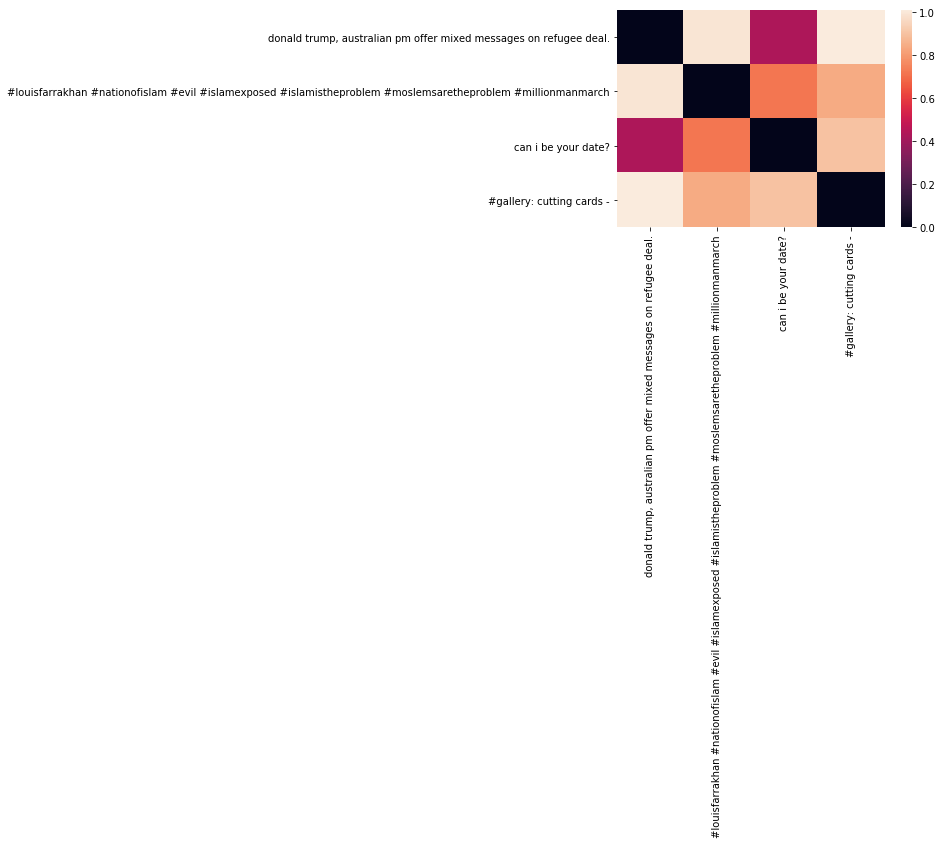

In [41]:
count_vectorizer_t = CountVectorizer()
svd_t = TruncatedSVD(n_components=100)

embedding_matrix_t = count_vectorizer_t.fit_transform(clean_tweets)
PCA_t = svd.fit_transform(embedding_matrix_t)
visualize_dist(PCA_t, clean_tweets, [55,66,77,88])

The distance calculated with the visualize_dist function makes sense, although sometimes it can be harder to interpret in comparison to Word2Vec.

In [ ]:
# More bonus!
# Use one of the following pre-embedded models and see if your yelp scores improve? 
# What about your Twitter explorations?

# https://github.com/RaRe-Technologies/gensim-data